# Importing the data

In [68]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import precision_score as pcs
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [4]:
print(df.dtypes)

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object


# Remove Null Values

In [5]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [6]:
#Null removal not required

# Discovery and Visualisation

## Disease rates

In [7]:
print(df['sex'].unique())
print("______")
print(df['chest pain type'].unique())
print("______")
print(df['fasting blood sugar'].unique())
print("______")
print(df['resting ecg'].unique())
print("______")
print(df['ST slope'].unique())
print("______")

[1 0]
______
[2 3 4 1]
______
[0 1]
______
[0 1 2]
______
[1 2 3 0]
______


*sex* 1 - male, 0 - female <br>
*chest pain type* 1 - typical angina, 2 - atypical angina, 3 - non-anginal pain, 4 - asymptomatic <br>
*fasting blood* sugar 1 > 120mg/dk, 2 < 120 mg/dl <br>
*resting ecg* results 0 - normal, 1, ST-T wave abnormality, 2 - left ventricular hypertrophy<br>
*ST slope 1* - upsloping, 2 - flat, 3 - downsloping<br>

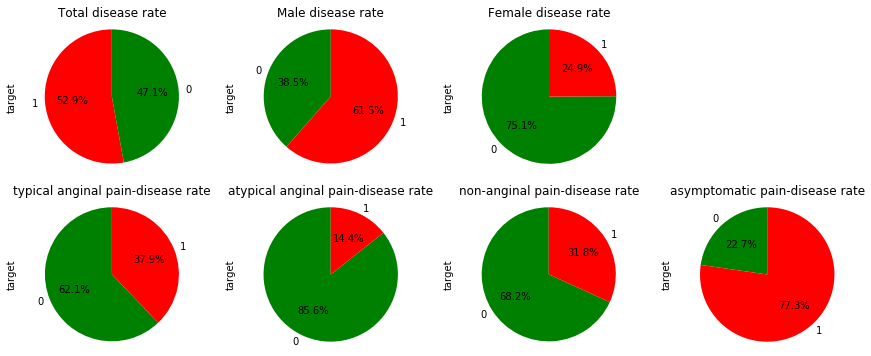

In [8]:
plt.figure(figsize = (15, 6))
plot_params1 = {'kind':'pie', 'startangle': 90, 'autopct':'%1.1f%%', 'colors':['red', 'green']}
plot_params2 = {'kind':'pie', 'startangle': 90, 'autopct':'%1.1f%%', 'colors':['green', 'red']}

# how many have disease vs how many don't
plt.subplot2grid((2,4), (0,0))
df.target.value_counts() \
.plot(title='Total disease rate', **plot_params1).axis('equal')


# disease rate wrt Sex
df_male = df.target[df['sex'] == 1].value_counts(normalize=True, sort=False)
df_female = df.target[df['sex'] == 0].value_counts(normalize=True, sort=False)

## male disease plot
plt.subplot2grid((2,4),(0,1))
df_male.plot(title='Male disease rate', **plot_params2).axis('equal')

## female survival plot
plt.subplot2grid((2,4),(0,2))
df_female.plot(title='Female disease rate', **plot_params2).axis('equal')



# Survival rate wrt chest pain type
df_tangina = df.target[df['chest pain type'] == 1].value_counts(normalize=True, sort=False)
df_atangina = df.target[df['chest pain type'] == 2].value_counts(normalize=True, sort=False)
df_nonangina = df.target[df['chest pain type'] == 3].value_counts(normalize=True, sort=False)
df_asympt = df.target[df['chest pain type'] == 4].value_counts(normalize=True, sort=False)


## typical angina
plt.subplot2grid((2,4),(1,0))
df_tangina.plot(title='typical anginal pain-disease rate', **plot_params2).axis('equal')

## typical angina
plt.subplot2grid((2,4),(1,1))
df_atangina.plot(title='atypical anginal pain-disease rate', **plot_params2).axis('equal')

## typical angina
plt.subplot2grid((2,4),(1,2))
df_nonangina.plot(title='non-anginal pain-disease rate', **plot_params2).axis('equal')

## typical angina
plt.subplot2grid((2,4),(1,3))
df_asympt.plot(title='asymptomatic pain-disease rate', **plot_params2).axis('equal')


plt.show()

This is just an example of what the data looks like. <br>
The data is quite balanced, as both values of target are almsot equally present.<br>
As you can see, males are more likely to have heart disease. Interestingly, of the patients that report no pain, 77.3% have heart disease.

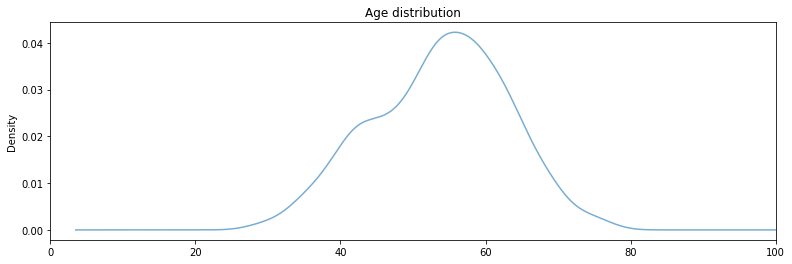

In [9]:
plt.figure(figsize=(13,4))

# plots a bar graph of the age distribution
df.age.plot(kind='kde', alpha=0.6, title='Age distribution', xlim=(0, 100))

plt.show()

Most of the cases are seen in people near 60 years of age

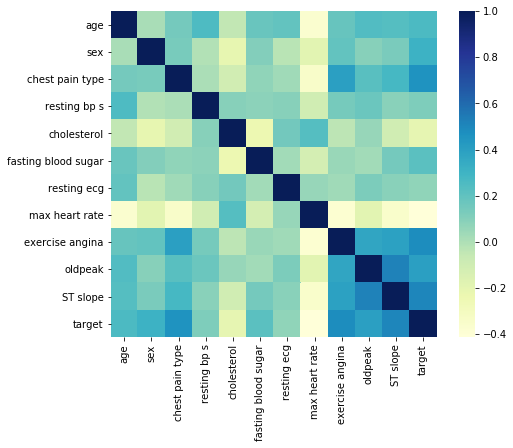

In [10]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(method = 'pearson'), square= True, cmap="YlGnBu")
plt.show()

*Correlation matrix*
Here, we can see that the features that have the highest correlation to target are chest pain type, exercise angina, ST slope, and max heart rate. Basic algorithms are expected to work off of these the most to find the classification model.

In [11]:
corr_matrix = df.corr()
corr_matrix['target'].sort_values(ascending=False)

target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
oldpeak                0.398385
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
resting bp s           0.121415
resting ecg            0.073059
cholesterol           -0.198366
max heart rate        -0.413278
Name: target, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184BD12BC48>,
      dtype=object)

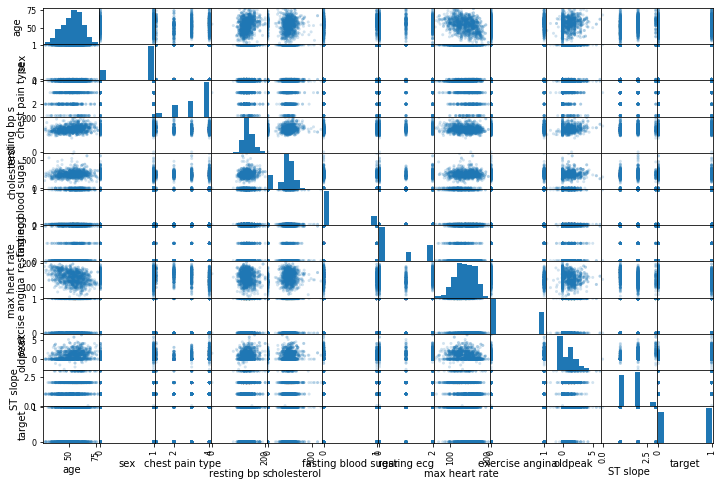

In [12]:
scatter_matrix(df, alpha = 0.2, figsize=(12,8), diagonal='hist')

Visualising the correlation between data

# Scaling and Splitting

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [14]:
X[1]

array([ 49.,   0.,   3., 160., 180.,   0.,   0., 156.,   0.,   1.,   2.])

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X[1]

array([-0.50460037, -1.79857595, -0.24893198,  1.51658739, -0.29951178,
       -0.52092948, -0.80267229,  0.63775761, -0.79521891,  0.07111913,
        0.61558278])

In [17]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.3, random_state=32)
for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Classification

## Ridge Classifier

In [18]:
rcc = RidgeClassifier(normalize = False, copy_X = True, random_state = 32)
rcc.fit(X_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=32, solver='auto',
                tol=0.001)

In [19]:
y_rccpred = rcc.predict(X_test)

In [20]:
print(metrics.classification_report(y_test, y_rccpred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       168
           1       0.85      0.84      0.84       189

    accuracy                           0.83       357
   macro avg       0.83      0.83      0.83       357
weighted avg       0.83      0.83      0.83       357



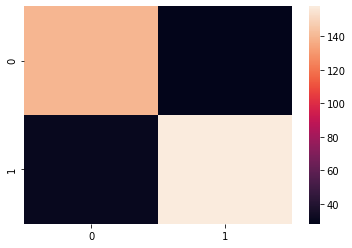

In [21]:
sns.heatmap(metrics.confusion_matrix(y_test, y_rccpred))

## Adaboost Classifier

In [22]:
abc = AdaBoostClassifier(n_estimators = 50, random_state = 32)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=32)

In [23]:
y_abcpred = abc.predict(X_test)

In [24]:
print(metrics.classification_report(y_test, y_abcpred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       168
           1       0.87      0.84      0.85       189

    accuracy                           0.85       357
   macro avg       0.85      0.85      0.85       357
weighted avg       0.85      0.85      0.85       357



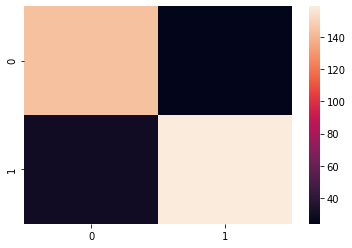

In [25]:
sns.heatmap(metrics.confusion_matrix(y_test, y_abcpred))

## Random Forest Classifier

In [26]:
rfc = RandomForestClassifier(max_depth = 5, random_state = 2)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [27]:
y_rfcpred = rfc.predict(X_test)

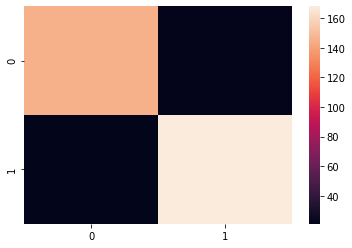

In [28]:
sns.heatmap(metrics.confusion_matrix(y_test, y_rfcpred))

## K Nearest Neighbours

In [42]:
k = int(math.sqrt(len(y_test)))

18


In [44]:
knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')

In [31]:
y_knnpred = knn.predict(X_test)

In [32]:
print(metrics.classification_report(y_test, y_knnpred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       168
           1       0.93      0.93      0.93       189

    accuracy                           0.93       357
   macro avg       0.93      0.93      0.93       357
weighted avg       0.93      0.93      0.93       357



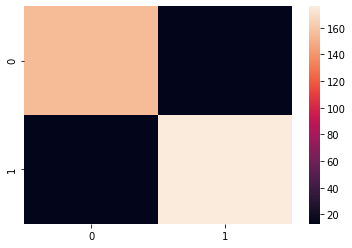

In [33]:
sns.heatmap(metrics.confusion_matrix(y_test, y_knnpred))

## Gaussian Naive Bayes

In [34]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
y_gnbpred = gnb.predict(X_test)

In [36]:
print(metrics.classification_report(y_test, y_gnbpred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       168
           1       0.87      0.83      0.85       189

    accuracy                           0.84       357
   macro avg       0.84      0.84      0.84       357
weighted avg       0.84      0.84      0.84       357



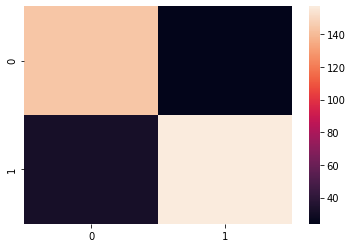

In [37]:
sns.heatmap(metrics.confusion_matrix(y_test, y_gnbpred))

## Multi Layer Perceptron neural network

In [38]:
mlp = MLPClassifier(solver = 'lbfgs', random_state = 10, max_iter = 100)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [39]:
y_mlppred = mlp.predict(X_test)

In [40]:
print(metrics.classification_report(y_test, y_mlppred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       168
           1       0.90      0.90      0.90       189

    accuracy                           0.90       357
   macro avg       0.90      0.90      0.90       357
weighted avg       0.90      0.90      0.90       357



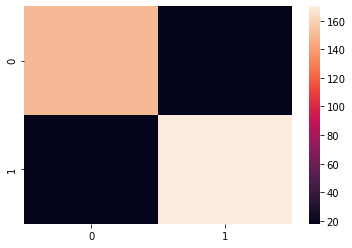

In [41]:
sns.heatmap(metrics.confusion_matrix(y_test, y_mlppred))

## Support Vector Machines

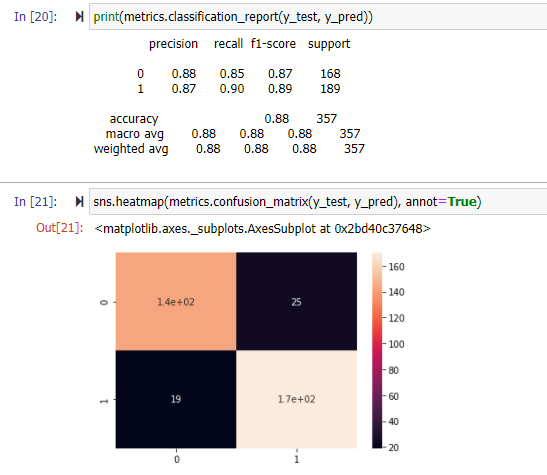

 # FSVM-CIL

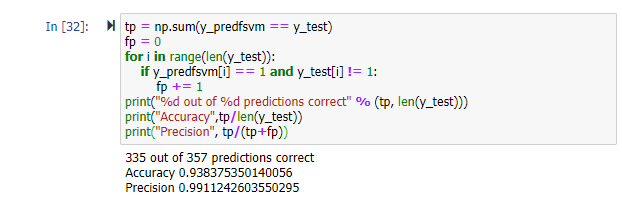

# Results

In [54]:
results = {"classifier": ["Ridge", "Adaboost", "RandomForest", "KNN", "Gaussian Naive Bayes", "MultiLayer Perceptron", "SVM", "FSVM"],
          "accuracy" : [acs(y_test, y_rccpred), acs(y_test, y_abcpred), acs(y_test, y_rfcpred), acs(y_test, y_knnpred), acs(y_test, y_gnbpred), acs(y_test, y_mlppred), 0.88, 0.938],
          "precision" : [pcs(y_test, y_rccpred), pcs(y_test, y_abcpred), pcs(y_test, y_rfcpred), pcs(y_test, y_knnpred), pcs(y_test, y_gnbpred), pcs(y_test, y_mlppred), 0.85, 0.991]  
          }
results_df = pd.DataFrame(data = results)

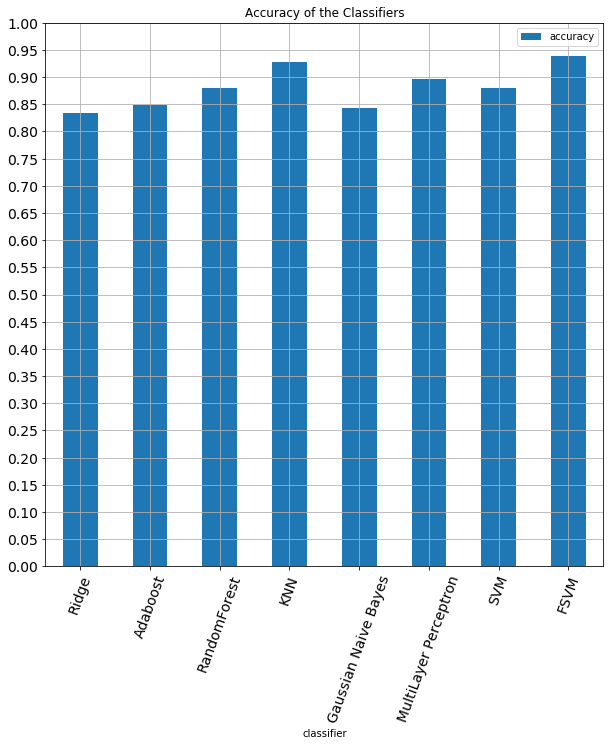

In [80]:
yticks = [i/20 for i in range(0,21)]
plot_kwargs = {'grid': True,  'rot': 70, 'yticks': yticks, 'figsize': (10,10), 'fontsize' : 14}
ax = results_df.plot.bar(x="classifier", y="accuracy",  title="Accuracy of the Classifiers", **plot_kwargs)

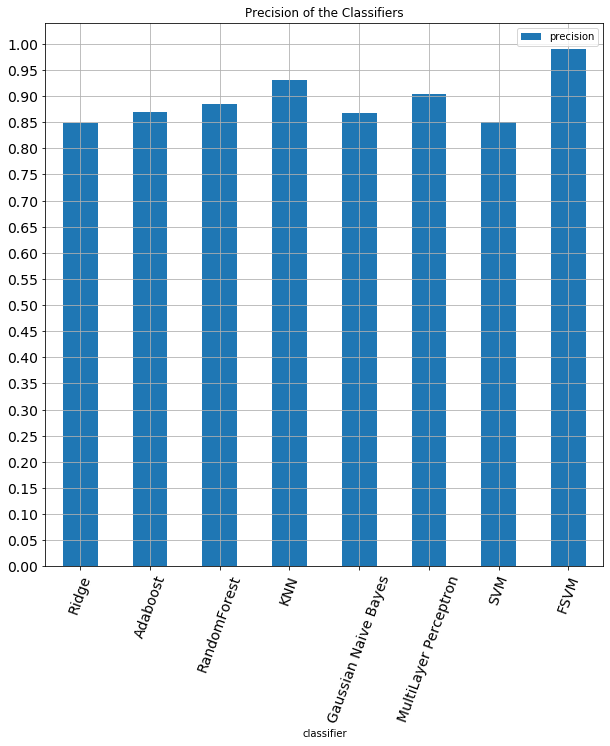

In [81]:
results_df.plot.bar(x="classifier", y="precision", title="Precision of the Classifiers", **plot_kwargs)